# Clustering



## Objectives

- Learn to generate data points suitable for clustering practises using Scikit-Learn.
- Learn to perform clustering of a set of data points using Scikit-Learn k-Means algorithm and Minibatch k-Means.
- Examine how to identify a suitable number of clusters.
- Learn how to evalutate the quality of the clustering solution.
- Demonstrate the application of clustering in outlier detection and image quantization.


## Introduction

Clustering algorithms partition data objects into several groups, subsets or categories. They help to discover groups of data samples with similar values or patterns. These techniques are used in many domains like:
- Engineering - Information Compression, noise removal
- Computer Science - Web mining, Information Retrieval
- Life and Medical Science – Taxonomy definition, gene and protein function iidentification
- Astronomy and Earth Science – Classification of stars aand planets
- Social Science – Behaviour pattern analysis, relation identification among cultures
- Enconomics – Customer characteristics pattern recognition, stock trend analysis, fraud detection

Clustering is sometimes performed before predictive modelling. After clustering, we can study and model each individual cluster separately or use the cluster grouping as an additional input for subsequent modelling processes.

There are many different clustering algorithms, but only a few are widely used. This is because many hierarchical clustering methods require that distances between every pair of data points to be stored and updated in memory, which places a substantial demand on computer memory and processing resources if the data set is large. Typically, we use the k-Means clustering algorithm which is less demanding on the memory requirements.

In this practical, we will look at how we can apply the k-Means clustering algorithm using Scikit-Learn and how we can 
reduce the demand on computing resource using the MiniBatch k-Means algorithm that is more sutiable for larger data sets.

## Generate Data

Let us begin by generating some data for our practises.

### Step 1
Enter the following codes to generate 500 data points centered around 3 centroids, that is, the 500 data points forms 3 clusters.
```python
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(500, centers=3, random_state=42)
```



In [ ]:
#Enter Codes here


Note that the ```data``` variable contains the generated 2-D samples while the ```classes``` variable contains the cluster number each sample belongs to.



### Step 2

Print out the first 10 items of the data and classes varaibles to see the generated data. 

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```
print(data[:10])
print(classes[:10])
```

In [ ]:
#Enter your codes here


You should see the content of data and classes variables as follows:

The ```data``` variable consists of an array of 2-dimensional points:

```
[[-5.73035386 -7.58328602]
 [ 1.94299219  1.91887482]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [ 5.84109276  1.56509431]
 [ 5.47021465  1.11708586]
 [-4.31954265 -6.97616949]
 [ 4.91033566  1.92293157]
 [ 3.57225841  1.8307902 ]
 [-7.50444577 -6.85401854]]

```
     
     
The ```classes``` variable contains the cluster number that each data point belongs to:

```
[2 1 1 0 1 1 2 1 1 2]
```

Note that we have the actual cluster that the data belongs to because we generated the data. In actual situation, we will not have this information. 

Later, we will be using the k-Means clustering algorithm to cluster the data point, the ```classes``` variable will be  useful for us to compare and measure the clustering performance of the algoritm.


### Step 3 Visualize the Data

We should visualize the data so that we have a feel of how the data is like before we perform the clustering process.

Use the following codes to generate a scatter plot of the data:

```python
import matplotlib.pyplot as plt
#Create a figure
plt.figure()
#Red, green and blue will be used to colour the clusters
rgb = np.array(['r', 'g', 'b'])
#Create scatter plot based on the first (0) and second column (1)
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes])
plt.title("Clusters")
plt.show()
```


In [ ]:
#Enter your codes here



The code uses three different colours to show the individual clusters. If you run the codes, you should be able to see the following figures:

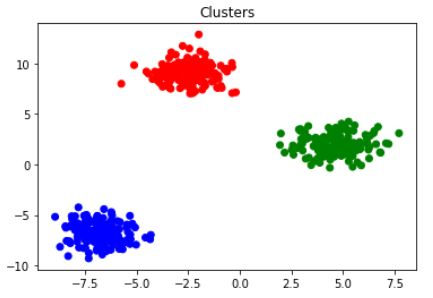

Note that we set the random_state arugment of the make_blob() function as 42 for reproducible result.  You can try to use different number to generate different clusters if you prefer. Whatever integer values you choose, you should be able to see three separate clusters.

## k-Means Clustering 

k-means clustering is a relatively quick method for exploring clusters in data. The user sets the number of clusters (hyper-parameter k) to be created, and the procedure selects k well-spaced data records as starting centroid. Each data record is then assigned to the nearest centroid of the k clusters. The cluster centroids (average value of the attributes used in the clustering) are updated to accommodate the new members. Additional data passes are made as needed. As the cluster centers shift, a data point may need to be moved to its new nearest centroid. 

For the hyper-parameter k, we usually do not know what is a good value for k. We typically need to run the clustering process several times to find a suitable value for k. We will explore this in the later section.

Let us now use Scikit-Learn's k-Means algorithm to perform clustering and visually inspect how well the clustering was done.

### Step 4 Performing k-Means Clustering

Key in the following codes to perform clustering:

```python
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
#We use 1000 points
data, classes = make_blobs(1000, centers=3, random_state=42)

#Import the k-Means algorithm
from sklearn.cluster import KMeans

#Perform the clustering
kmeans = KMeans(n_clusters=3).fit(data)
```

In [ ]:
#Enter your codes here



### Step 5 Plotting Clustering Results

It will be useful if we can visualize our clustering results, so use the following codes to plot the clusters:


```python
#Create a new plot
plt.figure()

#Subplot on the left
#121 = 1 row, 2 columns, subplot plot 1
plt.subplot(121) #Use subplot() to plot the generated data and results from k-Means clustering
#Use different colours for different cluster based on the generated data.
rgb = np.array(['r', 'g', 'b'])
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes]) 
plt.title("Generated Data")


#Subplot on the right
#122 = 1 row, 2 columns, subplot plot 2
plt.subplot(122)
#Plot the same data except use results from our k-mean clustering(kmeans.labels_)
#Different colours for different cluster based kmeans.labels_
plt.scatter(
    data[:, 0],  #x
    data[:, 1],  #y
    color=rgb[kmeans.labels_])


#Plot the centroid of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0], #x
    kmeans.cluster_centers_[:, 1], #y
    marker="*", # use a star
    s=200, # size is 200 (bigger)
    color="Yellow",
    label="Centroid")
plt.title("Clustered by k-Means")
plt.legend()
plt.show()
```

In [ ]:
#Enter your codes here



Run the codes to view the clustering results.


As can be seen from the above plots, the k-Means algorithm has formed three clusters since we indicated ```center=3```. 

From visual inspection, we can see that the algorithm has done a good job of clustering the data points, the generated cluster membership closely resembles that in the ```classes``` variable. Choose the correct k value (k=3) certainly plays a part as it coincides with our generated data. However, in most real cases, we might not know the number of clusters and must make a guess, what happens if we try other values of k?


## Exercise

Modify the codes and try different values of k (e.g 2, 4, 5). Remember to add more colours to the rbg array if necessary.
```python
rgb = np.array(['r', 'g', 'b', 'y']) #if k=4, needs to have at least 4 colours
```
For reference, acceptable single character colours are:
```python
{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
```

Shown below is the result for value of k=4:

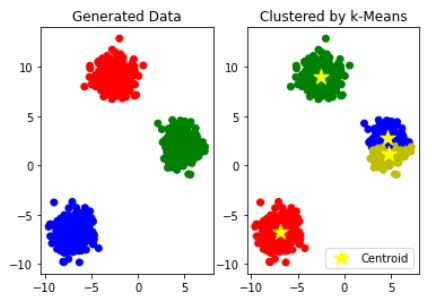


In [ ]:
#Enter your exercise codes here


## Evaluating Cluster Quality

There are various methods to evaluate the quality of a clustering solution. Quality of clustering are generally defined by the inter- and intra-class similarity. A high-quality clustering should have high intra-class similarity and low inter-class similarity. One of the measuring score provided by Scikit-Learn is the _silhouette coefficient_.

### Silhouette Coefficient
Silhouette coefficient offers a way for us to measure the consistency for clusters of data. The silhouette coefficient for a single data sample is defined as:

Silhouette Coefficient =$\frac{b-a}{max(a, b)}$


Where  
```a``` = mean intra-cluster distance (average of distances between members of the cluster)  
```b``` = mean nearest-cluster distance (the average distance between the sample and the nearest cluster that it is not a member of)

Value of the silhouette is between -1 (worst) and 1 (best).

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


Let us now see how we can use Scikit-Learn to calculate the silhouette coefficient of a samples in a cluster.

### Step 6 Calculating Sihouette Coefficient

Add the following codes to generate new clusters, calculate the silhouette coefficient and plot the graphs for visualization:

```python
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(500, centers=3, random_state=42)

#Perform k-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(data)

#Silhouette coefficient
from sklearn import metrics

#Calculate the silhouette distance for every sample
silhouette_coefficients = metrics.silhouette_samples(data, kmeans.labels_)
print(silhouette_coefficients)

#Plot a histogram for visualization
plt.figure()
plt.hist(silhouette_coefficients, bins=40)
plt.show()
```

In [ ]:
#Enter your codes here



You should see that the silhouette coefficients are printing as shown below:

```
[0.87524201 0.65955844 0.78883164 0.8013415  0.84539973 0.85251441
 0.78372138 0.87370042 0.83129755 0.90941097 0.8402634  0.79155043
 0.57431928 0.84113737 0.73049716 0.80834052 0.86164249 0.89203671
 0.89397537 0.80793546 0.78205158 0.74082028 0.85956247 0.85811024
 0.91304371 0.87287071 0.77895624 0.89593428 0.89836282 0.83827309
 0.87281071 0.81970759 0.8480501  0.8465967  0.87051557 0.8601975
 0.83961461 0.77783256 0.90840541 0.89014618 0.83661504 0.81251017
 0.88051955 0.81313733 0.73212797 0.82267301 0.8739685  0.8466118
 0.84956606 0.91155168]
```

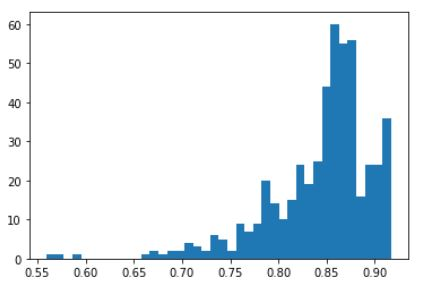

It would be more useful if we can use a single number to indicate the quality of the clustering instead of one number for each sample. We can use the average value of the silhouette coefficient.


### Step 7

Modify the codes to print out the average value of the silhouette coefficients instead of the cofficients and histogram:

```python
#Calculate the silhouette score of the clusters
silhouette_score = metrics.silhouette_score(data, kmeans.labels_)
print("Silhouette Score = {0:.2f}".format(silhouette_score))
```

Run the codes to view the result.

In [ ]:
#Enter your codes here



If you run the codes, you should see that we get a silhouette score of 0.84.

```
Silhouette Score = 0.84
```

Note that the silhouette score is simply the mean value of all the silhouette cofficients of the sample. You should be able to get the same value by printing *silhouette_coefficients.mean()*.


### Exercise

Repeat the above steps:

1. Generate a cluster with random_state=2. 
2. Plot a chart and from visual inspection you should note that the cluster has some overlaps. We expect k-Means to do worse compared with previous case.
3. Generate the silhouette score and check if score is worse compared to the case with random_state=42


<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

data, classes = make_blobs(500, centers=3, random_state=2)

kmeans = KMeans(n_clusters=3).fit(data)

silhouette_coefficients = metrics.silhouette_samples(data, kmeans.labels_)

#Plot a histogram for visualization
plt.figure()
plt.hist(silhouette_coefficients, bins=40)
plt.show()
silhouette_score = metrics.silhouette_score(data, kmeans.labels_)
print("Silhouette Score = {0:.2f}".format(silhouette_score))
```

In [ ]:
#Enter your exercise codes here


## Determining Value of k

Since we now have a way to evaluate the quality of a clutering solution, we can look for a suitable value of k by evaluating the silhouette score and selecting the k value with the best score. Note however, that this does not necessarily yields the best possible solution.

### Step 8 Finding Value of k

The following shows the codes used to find a good value of k based on the silhouette score:

```python
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics

#data = Generated data examples that forms 5 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(2000, centers=5, random_state=10)

# Since we generate cluster of 5 centers, we expect
# clustering solutions near k=5 will have the best
# silhouette score 

#For storing silhouette scores
silhouette_scores = []

#Calculate silhouette scores for k from 2 to 10
for k in range(2, 10):
    #k-Means clustering for different values of k
    kmeans = KMeans(n_clusters=k).fit(data)
    #Calculate the silhoutte score for the current value of k and add to the list
    silhouette_scores.append(metrics.silhouette_score(data, kmeans.labels_))

#Print out all the silhouette score for k = 2 to 10
print(silhouette_scores)
#Print out k with the largest value of silhouette in the silhouette_score list
max_score, max_index = max((max_score, max_index) for (max_index, max_score) in enumerate(silhouette_scores))

# +2 is needed because we start first element in 
# silhouette_list corresponds to k=2
print("Best value of k is {0} with silhouette score of {1}".format(max_index+2, max_score))
```


In [ ]:
#Enter your codes here



The code generate clusters with 5 centers and perform clustering for values of k from 2 to 10. Natually, we expect the silhouette score to be best for k=5 since we generated the clusters with the ```centers=5``` argument. Run the codes and you should get a similar result as follows:

```
[0.5831839693490849, 0.606440936062678, 0.6837161306731291, 0.7628612086779674, 0.6760806053765829, 0.5786531102367165, 0.4953266496551252, 0.40534426723512434]
Best value of k is 5 with silhouette score of 0.7628612086779674

```

Note thatt it gives a good answer but not necessarily the best answer. Try random_state=42 and you should see that k is 4 instead of 5. 


We can plot the scores on a graph for better visualization:


### Step 9 Visualization k vs Silhouette Scores

Add the following codes to plot a graph of various values of k versus the silhouette scores: 

```python
plt.figure()
plt.plot(range(2, 10), silhouette_scores)
plt.show()
```



In [ ]:
#Enter your codes here



As can be seen from the figure below, we have a best value of k at 5, which is what we have generated. Again, note that we might not necessarily get k=5 as the best answer. 

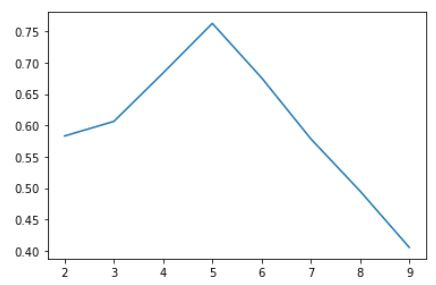


## MiniBatch k-Means

K-Means is generally popular as it is simple to understand and implement. However, there are some variations in the algorithm for better performance in terms of resource usage.  For example, the MiniBatch K-Means performs k-Means by iterating through small batches of data samples. It drastically reduces computing resources and can still achieve similar results in much shorter duration.

Scikit-Learn provides an implementation of the *MiniBatchKMeans* algorithm. Let us see how it compares in terms of speed.

### Step 10 MiniBatch

Run the following codes to compare the time it takes to perform clustering based on k-Means and MiniBatch k-Means.

```python
import numpy as np
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics

#Generate clusters
data, classes = make_blobs(100000, centers=5)

#Create k-Means and MiniBatch k-Means
kmeans = KMeans(n_clusters=5)
minibatch = MiniBatchKMeans(n_clusters=5, batch_size=100)

#Measures time taken for k-Means clustering
start_time = time.time()
kmeans.fit(data)
print("k-Means Elapsed Time: {0:.2f}".format(time.time() - start_time))

#Measures time taken for MiniBatch k-Means clustering
start_time = time.time()
minibatch.fit(data)
print("MiniBatch Elapsed Time: {0:.2f}".format(time.time() - start_time))
```



In [ ]:
#Enter your codes here



We use the 2 algorithms to cluster 100,000 data points with 5 centers. The following results were obtained:

```
k-Means Elapsed Time: 0.61
MiniBatch Elapsed Time: 0.22
```

As can be seen from the above result, MiniBatch is much faster, taking only 36% of the time for k-Means. Results varies depending on the speed of your computer.

Different batch sizes will affect the execution time. Generally, results from MiniBatch only differs slightly from k-Means but at much faster speed.

## Application of Clustering
There are many applications of clustering algorithm, we will first look at how clustering can be used to detect outliers. We will also apply clustering for image colour quantization to reduce the number of colours in an image. This will help reduce the file size of an image.

### Outliers Detection with Clustering

Let us next see how to use clustering to detect outlier using Scikit-Learn.
We will detect the outlier by measuring the distances of each point from the center of the cluster. The points that are furthest away from the center will be flagged as outliers.


### Step 11

Write codes to generate 500 data points with 1 center and use k-Means to perform clustering and display them in a scatter plot.

<details>

<summary><strong>Click to view codes</strong></summary>

```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Generate clusters
data, classes = make_blobs(500, centers=1)
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()
```

<details>


In [ ]:
#Enter your codes here



You should see a cluster similar to the following:

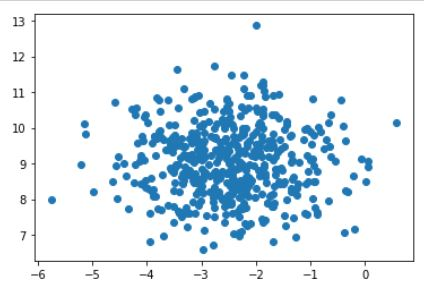

To detect outliers, we will first find the centre of the cluster and then flag the furthest 3 points as outliers.


### Step 12 k-Means and Centroid

We will apply k-Means clustering to detect the center and then use the ```transform()``` method to calculate the distance of every point to the center of the cluster. The codes are as follow:

```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1).fit(data)
distance_to_center = kmeans.transform(data)
```

In [ ]:
#Enter your codes here



If you print out the ```distance_to_center variable```, you will see the following:

```
[[3.25849725]
 [0.85515475]
 [1.15501297]
 [1.09506281]
 [2.23039083]
 [0.7381526 ]
 [1.60901319]
 [1.5594678 ]
 [2.56804781]
 [1.07450176]
 [1.34748939]
 [1.6671202 ]
 ```

     

### Step 13

Run the following codes to get 3 points with the largest distances from the centroid using ```argpartition``` and prints them out:

```python
print(distance_to_center)
#Get the 3 largest elements
#The argparition function with argument -2 divides the array 
#into 2 partitions with 3 largest elements at the end. Note this is not a sort function
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
outliers_index = np.argpartition(distance_to_center, -2, axis=0)[-3:]
print("Outliers: ")
for idx in outliers_index:
    print("Index: {0}, Distance: {1}".format(idx[0], distance_to_center[idx][0][0]))
```

In [ ]:
#Enter your codes here




You should get the output as shown below:

```
Outliers: 
Index: 0, Distance: 3.258497249471047
Index: 432, Distance: 3.4158213150967067
Index: 96, Distance: 3.8494286443498136
```

### Step 14 Visualizing Outliers

Use the following codes to plot the data points, centroid of the cluster as well as highlight the outliers:

```python
#The outliers variable contains the x an y coordinates of the 3 outliers
outliers = data[outliers_index][:,0]

#Plot the figure using scatter plot
plt.figure()
plt.scatter(data[:, 0], data[:, 1], label="Data Points", s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[0, 1], label="Centroids", marker="*")
plt.scatter(outliers[:,0], outliers[:,1], label="Outliers", edgecolors="g", facecolors="none", s=50)
plt.legend()
plt.show()
```


In [ ]:
#Enter your codes here



You should see a scatter plot similar to the one shown below:

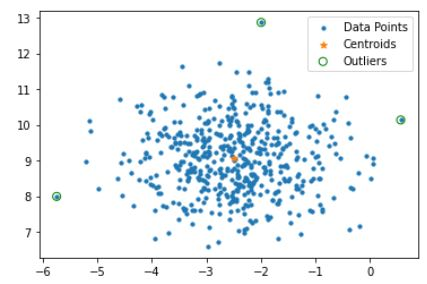

Notice that the outliers are highlighted as the furthest points from the centroid of the cluster.


## Image Quantization with Clustering

Another interesting application of clustering is in reducing the size (compress) of an image by discarding colour information. However, we would like to retain the colour that is most prominant. To do this, we can use clustering.

This part of the practical requires the use of the ```pillow``` package to handle image data. If it is not installed, you can either use the Anaconda Navigator to install it or use command ```conda install -c anaconda pillow``` in the Anaconda Prompt.

### Step 15 Preparing an Image

Place a JPG image file name “image.jpg” in the same directory as your python files. Note that the larger the file, the longer the processing takes.

### Step 16 Image Quantization Codes

Run the following codes that demonstrates the use of clustering in image quantization:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Convert to floats instead of the default 8 bits integer coding.
# Dividing by 255 is important so that plt.imshow works well,
# it works on float data in the range [0-1]
img = np.array(Image.open("image.jpg"), dtype=np.float64) / 255

# First display the unmodified figure
plt.figure()
plt.imshow(img)
plt.show()

#Reshape the img to 2-D array of RGB values
height, width, rgb = img.shape
img_2d = img.reshape(height*width, rgb)

# Use k-means to cluster to 5 centers, ie 5 different colours
kmeans = KMeans(n_clusters=5)
kmeans.fit(img_2d)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
# Reshape for image back from 2-D array
img_out = centroids[labels].reshape(height, width, rgb)

# Display the modified image
plt.figure()
plt.imshow(img_out)
plt.show()
# Save the modified image back to file
Image.fromarray((img_out * 255).astype(np.uint8)).save("image_out.jpg")
```


In [ ]:
#Enter your codes here



The above codes first load a JPEG image from a file. It then converts the data to a 2-D array for clustering. Finally it is saved back to the file system. It also displays the images for comparison purposes.

The following shows the original and quantized images using clustering:

**Original Image**
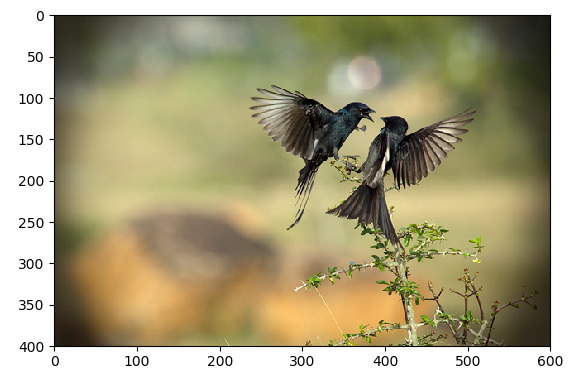


**Image after quantization with k=5**
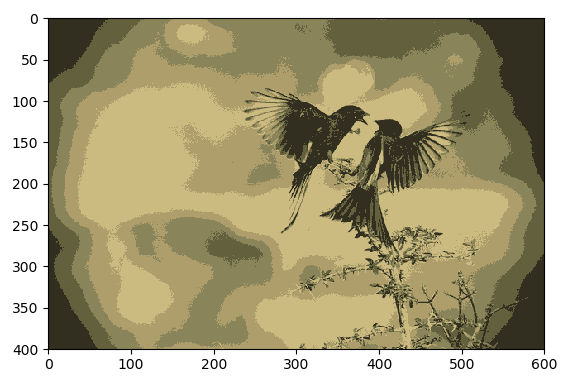


The sizes of the image are as shown below:

Original Image : 236 KB
Quantized Image : 31 KB

The compressed image is only about 13% of the original size with most colour information disregarded.
You can try with more colours (e.g. 10 instead of 5) to see how we can trade off image colour information for size.

For a similar demonstation of colour quantization using clustering , you can refer to https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html


# Summary

The practical demonstrated how to use Scikit-Learn to perform clustering. We use Scikit-Learn to help us generate data points that forms clusters according to a predefined hyper-parameter k.

We examinde how to perform clustering and visualize the results using scatter plots. We also see how to determine the quality of clustering using the silhouette scores. We also determine the best value of k by performing a series of clustering operations with different values of k and picking the model with the best silhoutte score.

Lastly, we looked at the application of clustering in outlier detection and image quantization.